In [38]:
#pip install /Users/qingchuanlyu/Documents/Conferences/ICML-2025/icml2025/code/mlrose

In [2]:
import mlrose_hiive as mh

In [3]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [4]:
import pandas as pd

In [29]:
# # Flip Flop with problem size 7
problem_ffp_tiny = mh.FlipFlopGenerator().generate(seed=0, size=7)
#state = problem_ffp.get_state()

In [30]:
# GAB runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GABRunner(problem=problem_ffp_tiny,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[3, 5], # 20 bits in total
              mutation_rates=[0.4, 0.5]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [31]:
df_run_curves_ffp.shape

(8, 7)

In [32]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.001095,2.0,0.0,3,0.4,2048
1,1,0.009742,6.0,2.0,3,0.4,2048
2,0,0.001095,2.0,0.0,3,0.5,2048
3,1,0.009742,6.0,2.0,3,0.5,2048
4,0,0.001095,2.0,0.0,5,0.4,2048


In [33]:
df_run_curves_ffp['Fitness'].max()

6.0

In [34]:
# need to check Time and FEvals

In [35]:
df_run_curves_ffp.dtypes

Iteration            int64
Time               float64
Fitness            float64
FEvals             float64
Population Size      int64
Mutation Rate      float64
max_iters            int64
dtype: object

In [36]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [37]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
1,1,0.009742,6.0,2.0,3,0.4,2048
3,1,0.009742,6.0,2.0,3,0.5,2048
5,1,0.009742,6.0,2.0,5,0.4,2048
7,1,0.009742,6.0,2.0,5,0.5,2048


In [38]:
df_curves_bestfitness_ffp.groupby(['Population Size', 'Mutation Rate']).agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals. Pick temp=1

,Population Size,Mutation Rate,FEvals,Iteration,Time
0,3,0.4,2.0,1.0,0.009742
1,3,0.5,2.0,1.0,0.009742
2,5,0.4,2.0,1.0,0.009742
3,5,0.5,2.0,1.0,0.009742


In [39]:
# pick any combination, as they're equivalent

In [40]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.001095,2.0,0.0,3,0.4,2048
1,1,0.009742,6.0,2.0,3,0.4,2048
2,0,0.001095,2.0,0.0,3,0.5,2048
3,1,0.009742,6.0,2.0,3,0.5,2048
4,0,0.001095,2.0,0.0,5,0.4,2048


In [91]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [92]:
# GAB runner
# 2. iterate through 10 seeds
for s in range(10):
    ga_ffp = mh.GABRunner(problem=problem_ffp_tiny,
              experiment_name='ffp_ga_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[3],
              mutation_rates=[0.4])

    # the two data frames will contain the results
    df_run_stats_ffp_sub, df_run_curves_ffp_sub = ga_ffp.run()
    print("number of rows")
    print(df_run_curves_ffp_sub.shape)
    # append to the result df
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])
    print("after concatenation")
    print(df_iter_curves_ffp.shape)

number of rows
(2, 7)
after concatenation
(2, 7)
number of rows
(21, 7)
after concatenation
(23, 7)
number of rows
(13, 7)
after concatenation
(36, 7)
number of rows
(18, 7)
after concatenation
(54, 7)
number of rows
(50, 7)
after concatenation
(104, 7)
number of rows
(11, 7)
after concatenation
(115, 7)
number of rows
(117, 7)
after concatenation
(232, 7)
number of rows
(2, 7)
after concatenation
(234, 7)
number of rows
(11, 7)
after concatenation
(245, 7)
number of rows
(35, 7)
after concatenation
(280, 7)


In [ ]:
df_iter_curves_ffp.to_csv('gab-flip-flop-ps7.csv')

In [93]:
df_iter_curves_ffp.Iteration.max()

116

In [94]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [95]:
df_fitness_iter_ffp.shape

(117, 3)

In [49]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness
0,0,2.90,0.544444
1,1,4.70,0.677778
2,2,4.50,0.285714
3,3,4.75,0.214286
4,4,4.75,0.214286


In [50]:
df_iter_curves_ffp.Fitness.max()

6.0

In [51]:
# converge point
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == df_iter_curves_ffp.Fitness.max()-1].Iteration.min()

9

In [52]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [53]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,2.90,0.544444,0.737865
1,1,4.70,0.677778,0.823273
2,2,4.50,0.285714,0.534522
3,3,4.75,0.214286,0.462910
4,4,4.75,0.214286,0.462910


Text(0, 0.5, 'Fitness')

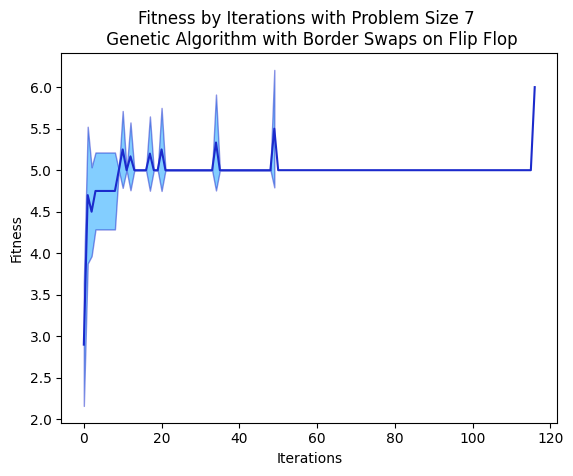

In [54]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#1B2ACC')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('Fitness by Iterations with Problem Size 7 \n Genetic Algorithm with Border Swaps on Flip Flop')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [71]:
# Fevals - iteration

In [55]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [56]:
df_FEvals_iter_ffp.shape

(117, 3)

In [57]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals
0,0,0.00,0.000000
1,1,1.90,0.100000
2,2,3.00,0.285714
3,3,4.25,0.214286
4,4,5.25,0.214286


In [58]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [59]:
df_FEvals_iter_ffp['stddev_FEvals'].min(), df_FEvals_iter_ffp['stddev_FEvals'].max()

(0.0, 1.1547005383792526)

In [60]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.00,0.000000,0.000000
1,1,1.90,0.100000,0.316228
2,2,3.00,0.285714,0.534522
3,3,4.25,0.214286,0.462910
4,4,5.25,0.214286,0.462910


Text(0, 0.5, 'FEvals')

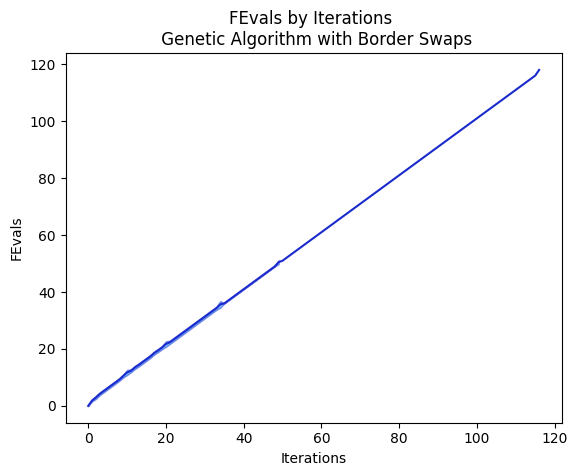

In [61]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#1B2ACC')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('FEvals by Iterations \n Genetic Algorithm with Border Swaps')
plt.xlabel('Iterations')
plt.ylabel('FEvals')

In [62]:
df_FEvals_iter_ffp[df_FEvals_iter_ffp.Iteration == 80]

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
80,80,81.0,NaN,NaN


In [63]:
df_FEvals_iter_ffp[df_FEvals_iter_ffp.stddev_FEvals == 0]['Iteration']

0      0
35    35
36    36
37    37
38    38
39    39
40    40
41    41
42    42
43    43
44    44
45    45
46    46
47    47
48    48
Name: Iteration, dtype: int64

In [64]:
# fitness - wall clock time

In [65]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [66]:
df_time_iter_ffp.shape

(117, 3)

In [67]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.000467,8.021403e-08
1,1,0.005439,7.429528e-06
2,2,0.012605,3.069368e-05
3,3,0.019403,4.445729e-05
4,4,0.020582,6.078846e-05


In [68]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [69]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.000467,8.021403e-08,0.000283
1,1,0.005439,7.429528e-06,0.002726
2,2,0.012605,3.069368e-05,0.005540
3,3,0.019403,4.445729e-05,0.006668
4,4,0.020582,6.078846e-05,0.007797


In [73]:
df_time_iter_ffp.stddev_time.max()

0.11721471170824876

Text(0, 0.5, 'Time')

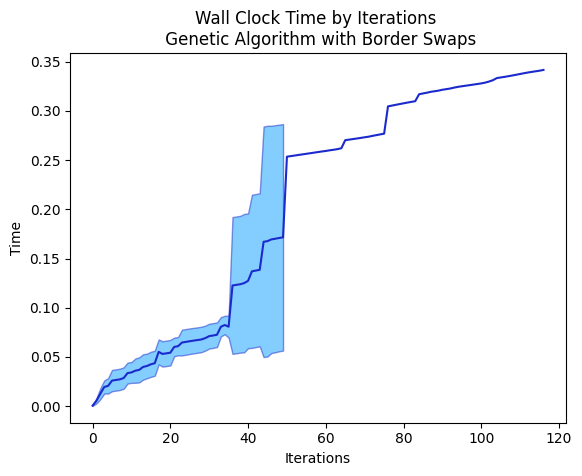

In [74]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#1B2ACC')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('Wall Clock Time by Iterations \n Genetic Algorithm with Border Swaps')
plt.xlabel('Iterations')
plt.ylabel('Time')

In [75]:
df_time_iter_ffp.avg_time.max()

0.34168930901796557

In [96]:
df_time_iter_ffp[df_time_iter_ffp.var_time.isna()].Iteration.min()

50

In [77]:
df_time_iter_ffp[df_time_iter_ffp.Iteration > 60]

,Iteration,avg_time,var_time,stddev_time
61,61,0.259984,NaN,NaN
62,62,0.260542,NaN,NaN
63,63,0.261178,NaN,NaN
64,64,0.262098,NaN,NaN
65,65,0.270261,NaN,NaN
66,66,0.270851,NaN,NaN
67,67,0.271407,NaN,NaN
68,68,0.271992,NaN,NaN
69,69,0.272604,NaN,NaN
70,70,0.273225,NaN,NaN


In [79]:
df_iter_curves_ffp[df_iter_curves_ffp.Iteration == 60]

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
60,60,0.259327,5.0,61.0,3,0.4,2048


In [85]:
df_iter_curves_ffp.groupby(['Iteration']).size().reset_index(name='counts') # 51 => 1 iter

,Iteration,counts
0,0,10
1,1,10
2,2,8
3,3,8
4,4,8
...,...,...
112,112,1
113,113,1
114,114,1
115,115,1


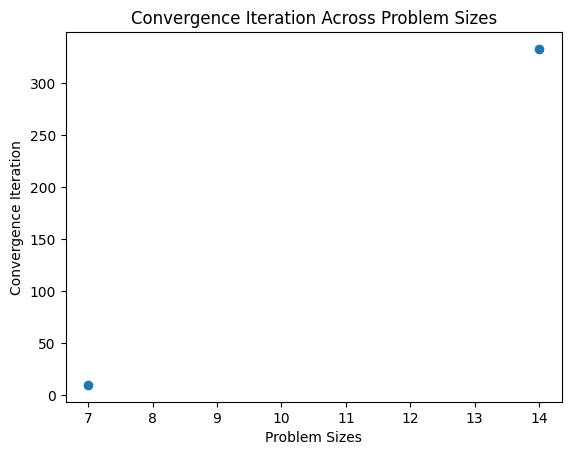

In [162]:
# scatter plot of convergent points across problem sizes
plt.scatter([7, 14], [10, 333])
plt.title('Convergence Iteration Across Problem Sizes')
plt.xlabel('Problem Sizes')
plt.ylabel('Convergence Iteration')
plt.show()